**Task - 03**

**Predict Student Scores**

Implement a simple linear regression model to
predict student scores based on the number of
hours they study.

In [34]:
import pandas as pd
import random
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn import linear_model


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv('/content/drive/MyDrive/Student_score/student_scores.csv')
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [38]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [40]:
X = df.drop(['Scores'], axis = 1 )
y = df['Scores'].values

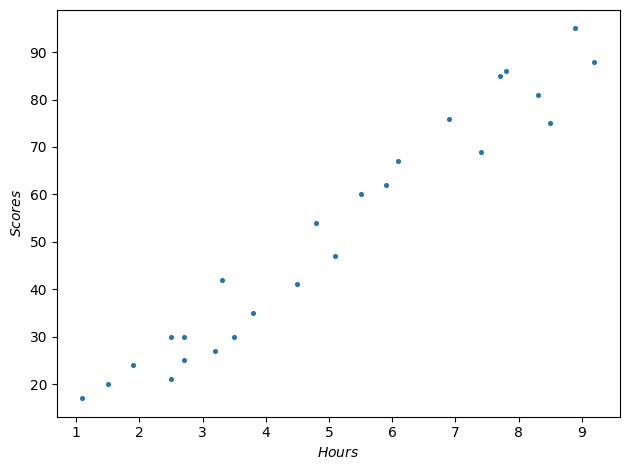

In [43]:
fig, ax = plt.subplots()
ax.scatter(X, y, s=7)
ax.set_xlabel('$Hours$')
ax.set_ylabel('$Scores$')
plt.tight_layout()


In [44]:
seed = 1111
# Get 80% of the dataset as the training set. Put the remaining 20% in test variables: x_test and y_test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
print(f"The shape of the training set (input) is: {X_train.shape}")
print(f"The shape of the training set (target) is: {y_train.shape}\n")

print(f"The shape of the test set (input) is: {X_test.shape}")
print(f"The shape of the test set (target) is: {y_test.shape}")

The shape of the training set (input) is: (20, 1)
The shape of the training set (target) is: (20,)

The shape of the test set (input) is: (5, 1)
The shape of the test set (target) is: (5,)


Feature scaling

In [46]:
# Initialize the class
model = linear_model.LinearRegression()

# Train the model
model.fit(X_train, y_train )

# Compute the training MSE
yhat = model.predict(X_train)
# Calculation MSE
mse = mean_squared_error(y_train, yhat)/2

# Calculation RMSE
rmse = np.sqrt(mse)

# Calculation R² Score
r2 = r2_score(y_train, yhat)

print(f"Training MSE: {mse}")
print(f"Training RMSE: {rmse}")
print(f"Training R2: {r2}")


Training MSE: 12.94825909483031
Training RMSE: 3.5983689492366273
Training R2: 0.9546518436072206


In [49]:
# Compute the cross validation MSE
y_pred = model.predict(X_test)

# Calculation MSE
mse = mean_squared_error(y_test, y_pred)/2

# Calculation RMSE
rmse = np.sqrt(mse)

# Calculation R² Score
r2 = r2_score(y_test, yhat)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")
print(f"Test R2: {r2}")


Test MSE: 23.36981666140153
Test RMSE: 4.834233823616885
Test R2: 0.8652881216197744


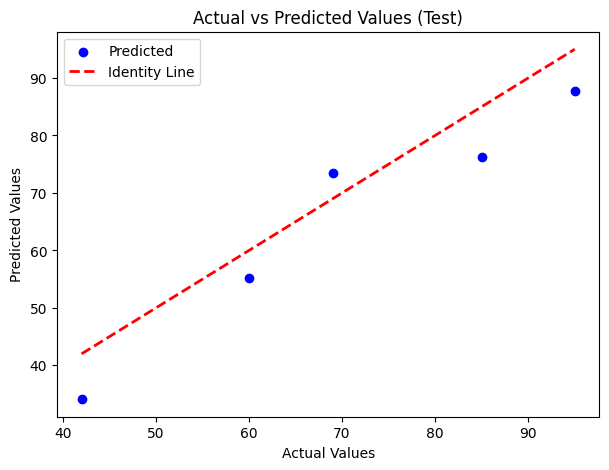

In [52]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, linestyle='--', label='Identity Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test)')
plt.legend()
plt.show()